<a href="https://colab.research.google.com/github/Bkevz/Data-Analytics/blob/main/Digit_Recognition_Using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Libraries

In [1]:
import pandas as pd
import numpy as np

###Access Google Drive content

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Load Dataset

In [5]:
data = "/content/gdrive/My Drive/digit.csv"
dataset = pd.read_csv(data)

###Summariza Data

In [6]:
print(dataset.shape)
print(dataset.head(5))

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

###Segregation of Dataset into X and Y variable

In [7]:
X = dataset.iloc[:,1:]
print(X)
print(X.shape)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [8]:
Y = dataset.iloc[:,0]
print(Y)
print(Y.shape)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
(42000,)


###Splitting Dataset into Test and Train

In [9]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

###Training

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0, n_jobs=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=10, random_state=0)

In [15]:
y_pred = model.predict(X_test)

###Model Accuracy

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the model: 96.32380952380953%


Predicted "0


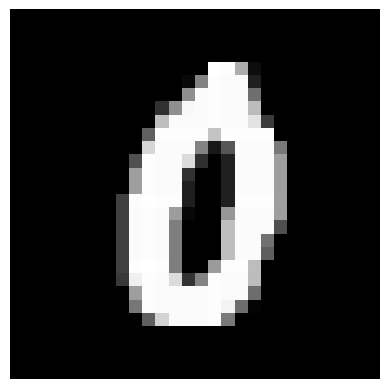

In [22]:
import matplotlib.pyplot as plt
index =7
print('Predicted "' + str(model.predict(X_test)[index]))
plt.axis('off')
plt.imshow(X_test.iloc[index].values.reshape((28,28)),cmap = "gray")
plt.show()